# Lab 1
## Explanation
Random bad pixels in satellite imagery can be caused by various factors such as sensor noise, transmission errors, or even hardware malfunctions. These bad pixels can negatively affect the quality of the imagery, and thus, can affect the accuracy of any analysis or interpretation of the imagery.

One approach to solve random bad pixels is to apply an algorithm that detects and replaces the bad pixels with values that are similar to the surrounding pixels. Here are the general steps to apply such an algorithm:

1- Identify the bad pixels in the image. This can be done using various methods such as visual inspection or automated detection algorithms.

2- Define a neighborhood around each bad pixel. The size of the neighborhood will depend on the characteristics of the imagery and the severity of the bad pixel.

3- Calculate the statistical properties of the pixels within the neighborhood, such as average.

4- Replace the bad pixel with the statistical value calculated in step 3. This can be done using various methods such as interpolation, spatial filtering, or regression analysis.

5- Repeat steps 2-4 for all the bad pixels in the image.

There are various algorithms that can be used to solve random bad pixels in satellite imagery, such as median filtering, nearest neighbor interpolation, or wavelet-based denoising. The choice of algorithm will depend on the characteristics of the imagery and the specific requirements of the analysis or application. It's worth noting that while these algorithms can improve the quality of the imagery, they may also introduce some level of smoothing or blurring to the image, which can affect the accuracy of some types of analysis or interpretation.

In [6]:
!pip install earthpy gdal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 46.3 MB/s eta 0:00:00


#TODO

Team Members:

1-Sara Gamal Gerges

2-Eman Ibrahim

In [7]:
##Import all needed libraries
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
import earthpy.plot as ep
import earthpy.spatial as es
import cv2


In [8]:
##The dataset is loaded to your GDrive so need to be mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1- Implement Random bad pixel removal algorithm
Shot noise is identified and repaired using the following methodology:
- First locate each bad pixel in the band k dataset: a simple thresholding algorithm makes a pass through the
dataset and flags any pixel (BVi,j,k) having a brightness value of zero (while the surrounding pixels are not 0).
- Once identified, it is then possible to evaluate the eight pixels surrounding the flagged pixel.

## Information provided as an output
### For each band display the following
  1- How many pixels are corrected in each band?

  2- Original image and the corrected image.



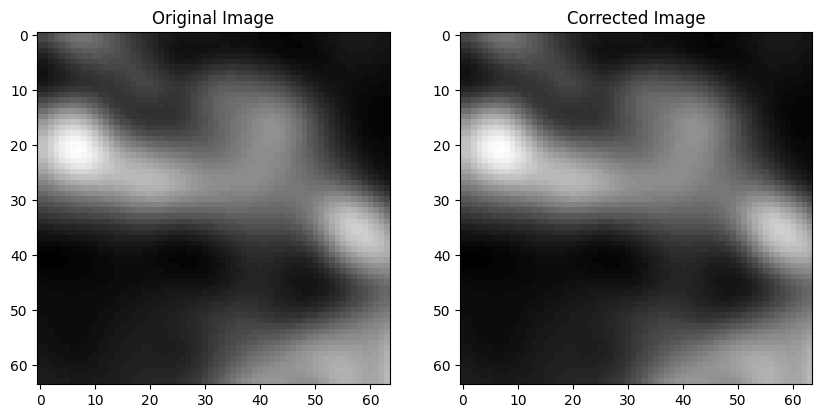

Number of corrected pixels is 0 in band#1


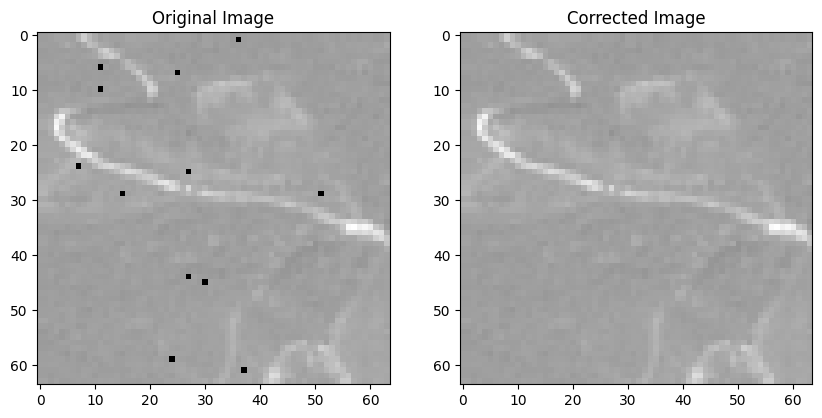

Number of corrected pixels is 12 in band#2


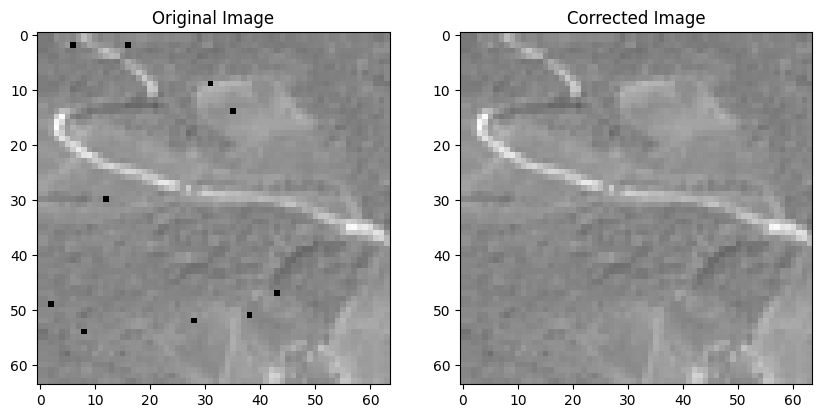

Number of corrected pixels is 10 in band#3


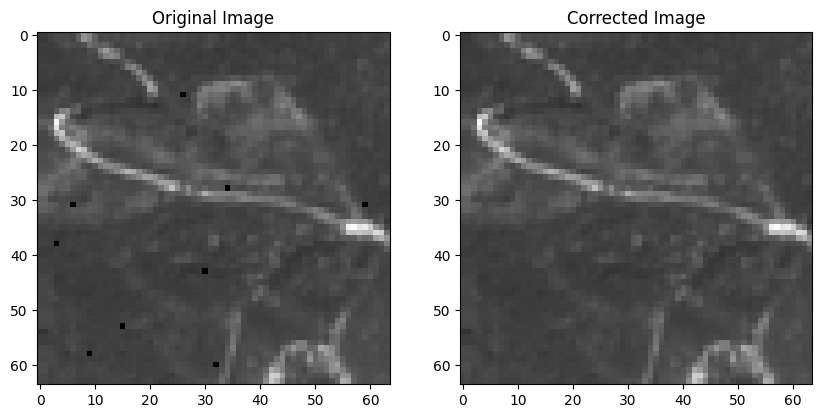

Number of corrected pixels is 9 in band#4


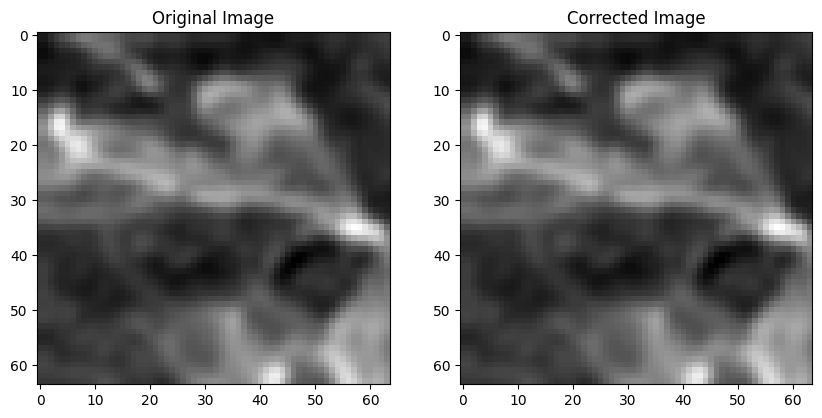

Number of corrected pixels is 0 in band#5


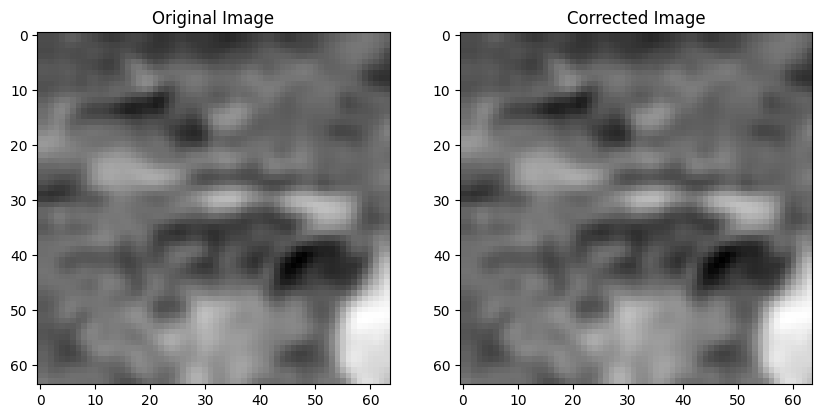

Number of corrected pixels is 0 in band#6


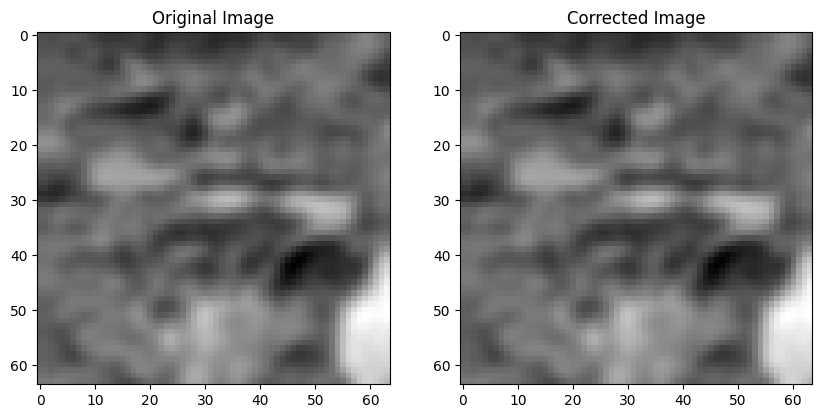

Number of corrected pixels is 0 in band#7


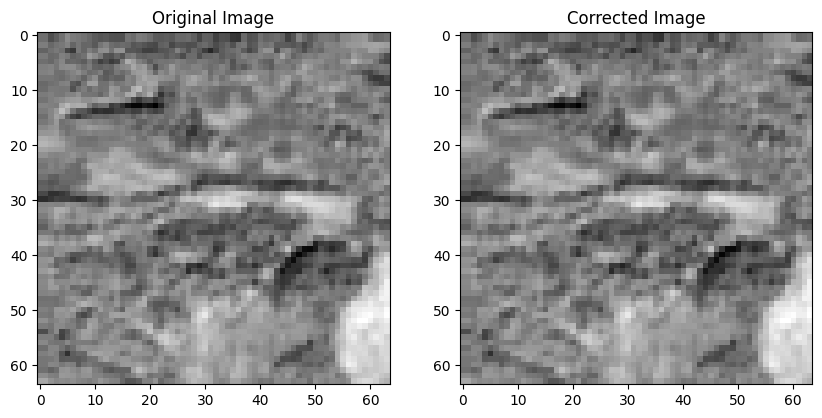

Number of corrected pixels is 0 in band#8


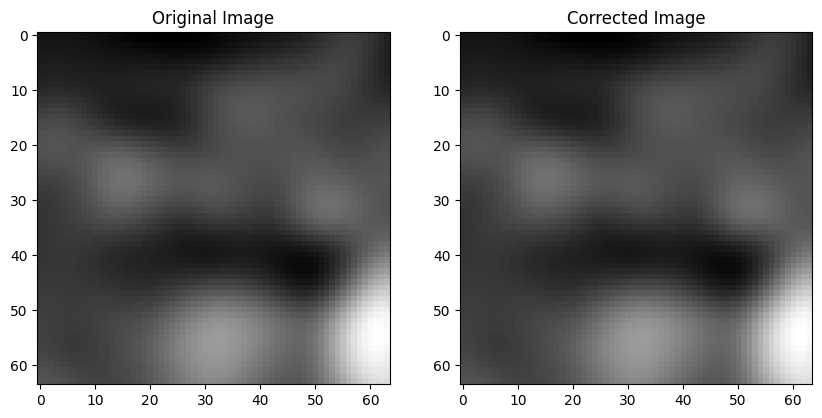

Number of corrected pixels is 0 in band#9


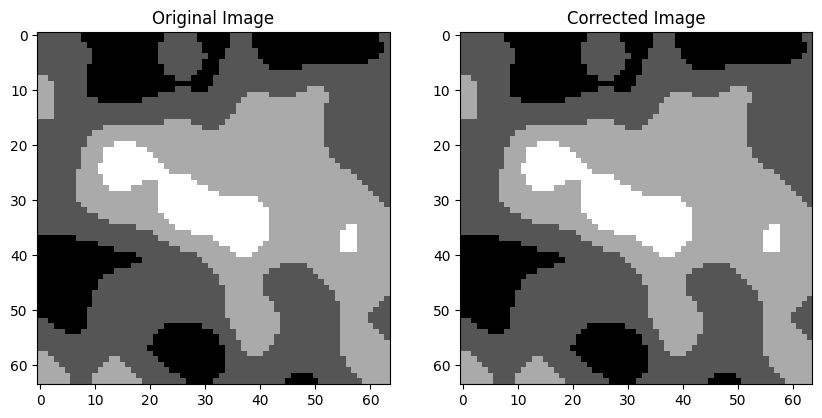

Number of corrected pixels is 0 in band#10


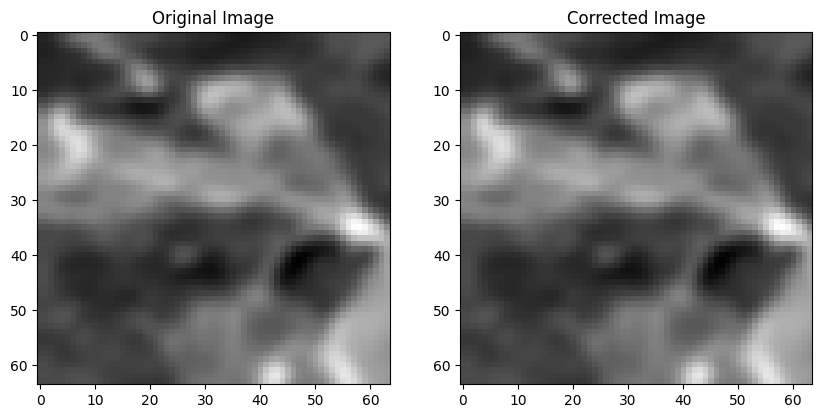

Number of corrected pixels is 0 in band#11


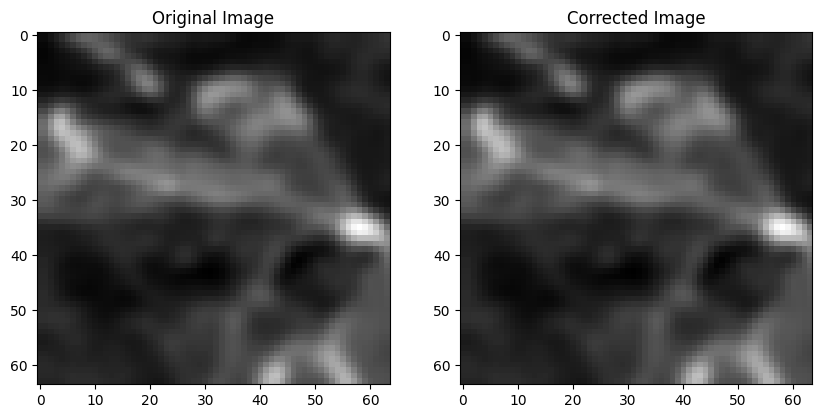

Number of corrected pixels is 0 in band#12


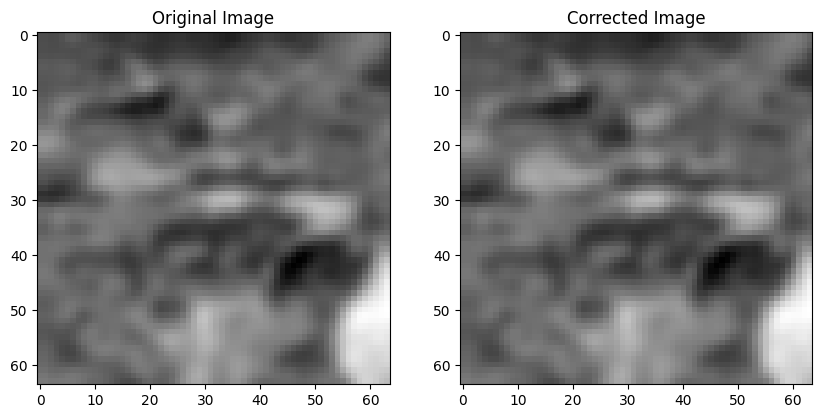

Number of corrected pixels is 0 in band#13


In [17]:
#Read in raster image 'RBN_Forest_27.tif'
img_ds= gdal.Open('/content/drive/MyDrive/RBN_Forest_27.tif', gdal.GA_ReadOnly)
num_bands=img_ds.RasterCount
# TODO: loop on all bands
for i in range(1,num_bands+1):
  num_of_pixels_corrected = 0
  # TODO: Extract band data
  band = img_ds.GetRasterBand(i)
  img = band.ReadAsArray()

  # TODO: Create a new image to store the corrected image pixels.
  corrected_img = img.copy()
  # TODO: Apply random bad pixel removal algorithm.
  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      #check if the pixel value is zero
      if img[row,col]==0:
        neighbors=[]
        #get the 8 neighbors of the pixel
        for r in range(row-1,row+2):
          for c in range(col-1,col+2):
            #check if the neighbor is out of the image
            if r<0 or r>=img.shape[0] or c<0 or c>=img.shape[1]:
              continue
            if  (r!=row or c!=col):
              neighbors.append(img[r,c])
            #check if the neighbor is zero

        if np.min(neighbors)!=0 :
          corrected_img[row][col] = np.mean(neighbors)
          num_of_pixels_corrected += 1

    # TODO: Display the original image, corrected image, and number of corrected pixels

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))
  axs[0].imshow(img, cmap='gray')
  axs[0].set_title('Original Image')
  axs[1].imshow(corrected_img, cmap='gray',vmin=np.min(img),vmax=np.max(img))
  axs[1].set_title('Corrected Image')
  plt.show()

  print("Number of corrected pixels is {} in band#{}".format(num_of_pixels_corrected, i))

# Q2- Implement Haze Removal by Dark Subtraction

## Information provided as an output
### Cell#1 : For each band
  1- Histogram.

  2- Threshold that will be used.

  3- Range of the values (min pixel intensity, max pixel intensity)

### Cell#2 : For each band
  4- Original image and the corrected image.

### Cell#3 : For each band
  5- Histogram.

  6- Range of the values (min pixel intensity, max pixel intensity)

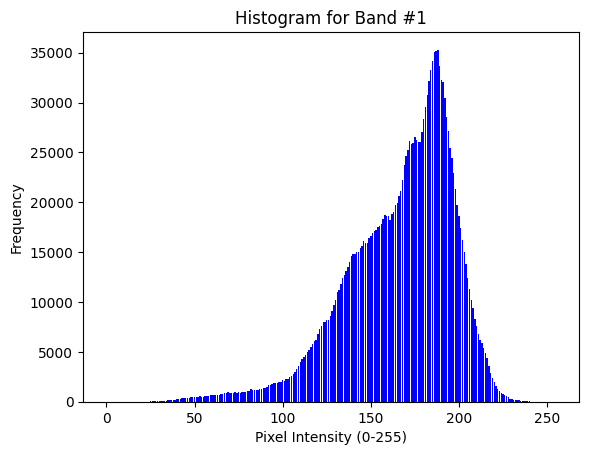

Threshold for this band is: 13
Range of values are : (13, 245)


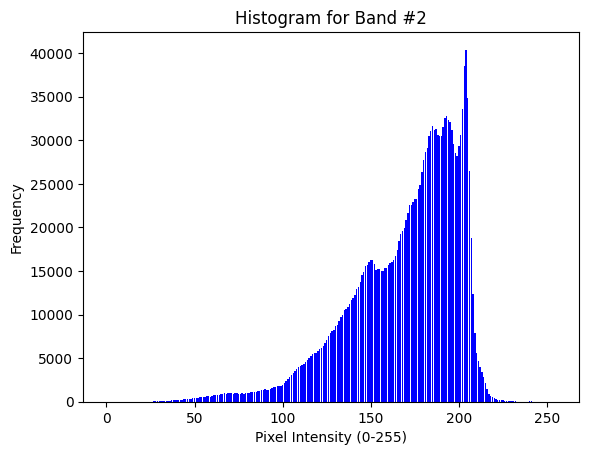

Threshold for this band is: 7
Range of values are : (7, 243)


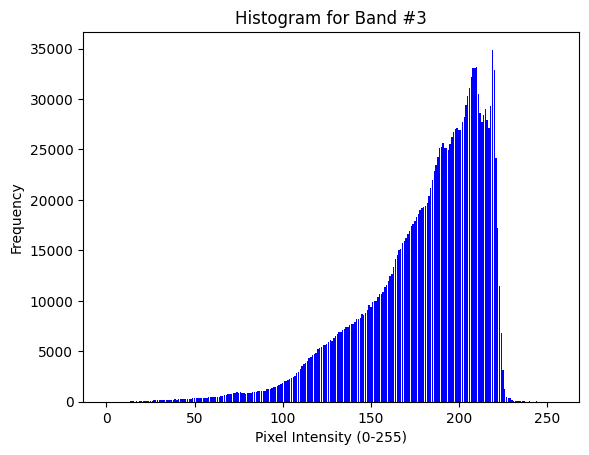

Threshold for this band is: 0
Range of values are : (0, 249)


In [20]:
# Cell#1
#Read in raster image 'haze_img.png'
img_ds= gdal.Open('/content/drive/MyDrive/haze_img.png', gdal.GA_ReadOnly)
num_bands=img_ds.RasterCount
# TODO: loop on all bands
threshold_array=[]
for band_num in range(1,num_bands+1):
    band = img_ds.GetRasterBand(band_num)
    img = band.ReadAsArray()
    histogram, _ = np.histogram(img, bins=256, range=(0, 255))
    plt.bar(range(256), histogram, color='blue')  # Use bar chart
    plt.title(f'Histogram for Band #{band_num}')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.show()
    threshold = np.min(np.where(histogram > 0))
    min_value = np.min(np.where(histogram > 0))
    max_value = np.max(np.where(histogram > 0))
    threshold_array.append(threshold)
    # TODO: Display threshold value that will be used for this band.
    print("Threshold for this band is: {}".format(threshold))
    # TODO: Display the range of values in this band
    print("Range of values are : ({}, {})".format(min_value, max_value))



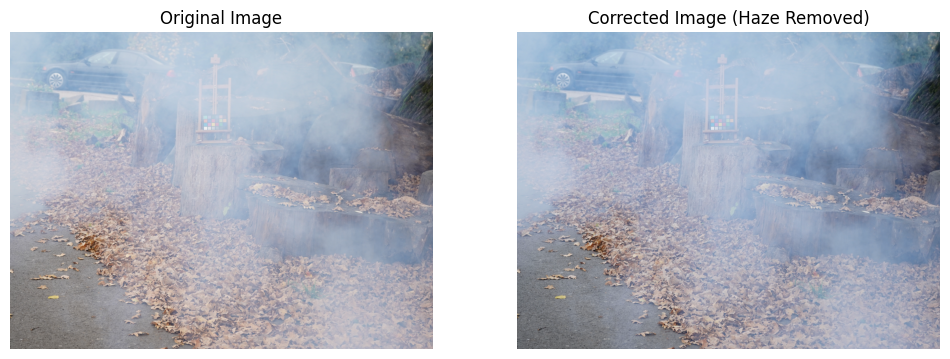

In [21]:
# Cell#2
# TODO: Copy original image into a new image.
driver = gdal.GetDriverByName("GTiff")
output_path = "/content/drive/MyDrive/haze_corrected.tif"
cols = img_ds.RasterXSize
rows = img_ds.RasterYSize
data_type = img_ds.GetRasterBand(1).DataType
corrected_img_ds = driver.Create(output_path, cols, rows, num_bands, data_type)
corrected_img_ds.SetGeoTransform(img_ds.GetGeoTransform())
corrected_img_ds.SetProjection(img_ds.GetProjection())
# TODO: loop on all bands
for band_num in range(1,num_bands+1):
    # TODO: Apply Haze Removal by Dark Subtraction
    band = img_ds.GetRasterBand(band_num)
    corrected_band = corrected_img_ds.GetRasterBand(band_num)
    img = band.ReadAsArray()
    img -= int(threshold_array[band_num - 1])
    corrected_band.WriteArray(img)

r_org = img_ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)
g_org = img_ds.GetRasterBand(2).ReadAsArray().astype(np.uint8)
b_org = img_ds.GetRasterBand(3).ReadAsArray().astype(np.uint8)
original=np.stack([r_org, g_org, b_org], axis=-1)

r_corr = corrected_img_ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)
g_corr = corrected_img_ds.GetRasterBand(2).ReadAsArray().astype(np.uint8)
b_corr = corrected_img_ds.GetRasterBand(3).ReadAsArray().astype(np.uint8)
corrected=np.stack([r_corr, g_corr, b_corr], axis=-1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(corrected)
axes[1].set_title("Corrected Image (Haze Removed)")
axes[1].axis('off')

plt.show()




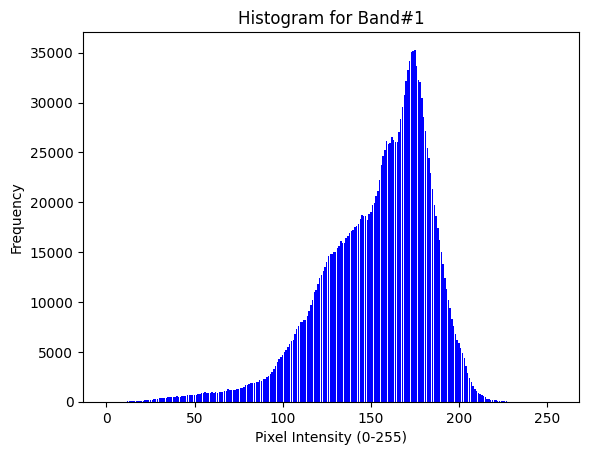

Range of values are : (0, 232)


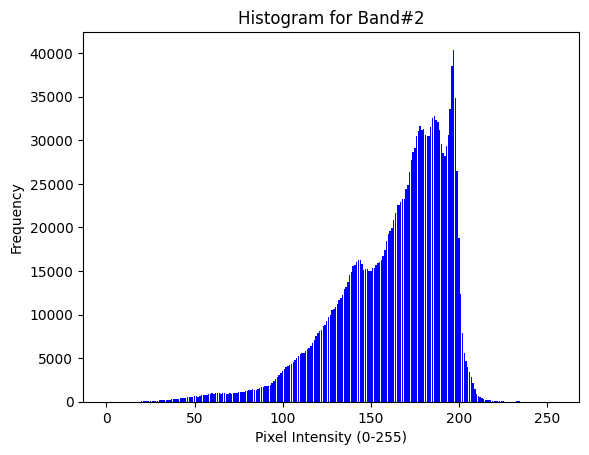

Range of values are : (0, 236)


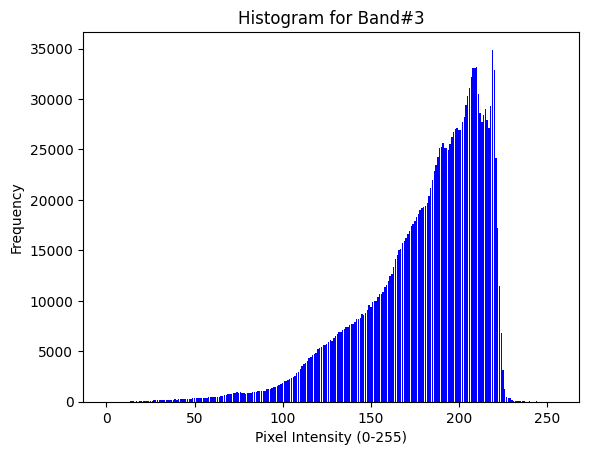

Range of values are : (0, 249)


In [22]:
# Cell#3

# TODO: loop on all bands
for band_num in range(1,num_bands+1):
    # TODO: Extract band data.
    corrected_band=corrected_img_ds.GetRasterBand(band_num)
    corrected_img = corrected_band.ReadAsArray()
    # TODO: Plot the histogram
    corrected_histogram, _ = np.histogram(corrected_img, bins=256, range=(0, 255))
    plt.bar(range(256), corrected_histogram, color='blue')  # Use bar chart
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    min_value = np.min(np.where(corrected_histogram > 0))
    max_value = np.max(np.where(corrected_histogram > 0))
    plt.title('Histogram for Band#{}'.format(band_num))
    plt.show()
    # TODO: Display the range of values in this band
    print("Range of values are : ({}, {})".format(min_value, max_value))